In [7]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import pickle

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "C:\\Users\\User\\Desktop\\Stage\\Optimal try\\images\\Train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    "C:\\Users\\User\\Desktop\\Stage\\Optimal try\\images\\Validation",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

base_model = InceptionV3(weights='imagenet', input_shape=(224, 224, 3), include_top=False)

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


Found 463 images belonging to 3 classes.
Found 110 images belonging to 3 classes.


In [8]:
Model_Checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'Inceptionmodelsave.keras',
    monitor='val_accuracy',
    save_best_only='True',
    verbose=1
)

Epoch 1/170
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 869ms/step - accuracy: 0.4290 - loss: 38.2797
Epoch 1: val_accuracy improved from -inf to 0.80909, saving model to Inceptionmodelsave.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.4341 - loss: 37.9256 - val_accuracy: 0.8091 - val_loss: 6.9299
Epoch 2/170
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 834ms/step - accuracy: 0.7271 - loss: 6.9572
Epoch 2: val_accuracy did not improve from 0.80909
15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 984ms/step - accuracy: 0.7263 - loss: 6.9110 - val_accuracy: 0.6727 - val_loss: 6.8613
Epoch 3/170
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 795ms/step - accuracy: 0.6260 - loss: 7.1140
Epoch 3: val_accuracy improved from 0.80909 to 0.86364, saving model to Inceptionmodelsave.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.6294 - loss: 7.0576 - val_accuracy: 0.8636 - val_loss: 2.0597
Epoch 4/170
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 797ms/step - accuracy: 0.7047 - loss: 3.9624
Epoch 4: val_accuracy did not improve from 0.86364
15/15 ━━━

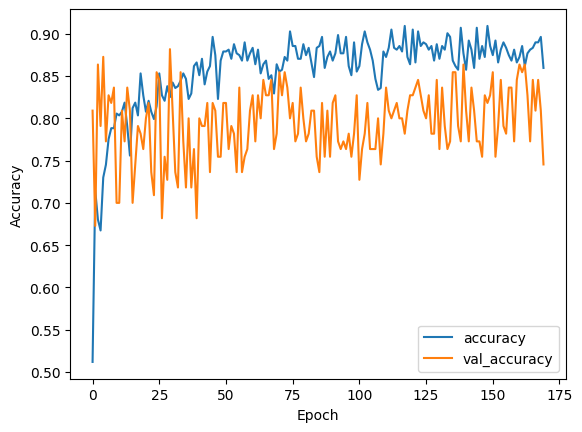

In [9]:
history = model.fit(
    train_generator,
    epochs=170,  
    validation_data=validation_generator,
    batch_size=32,
    callbacks=[Model_Checkpoint])  

with open('Inceptionv3training_history.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

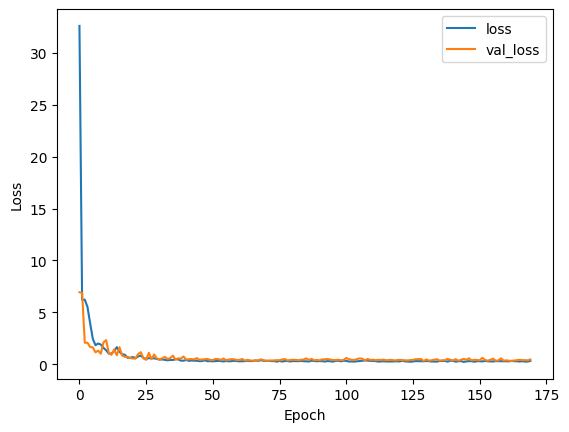

In [10]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
test_generator = test_datagen.flow_from_directory(
    "C:\\Users\\User\\Desktop\\Stage\\Optimal Try\\images\\Test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')
print(f'Test loss: {test_loss:.4f}')

Found 70 images belonging to 3 classes.


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 424ms/step - accuracy: 0.8888 - loss: 0.2683
Test accuracy: 87.14%
Test loss: 0.3172


In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
test_generator.reset()
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step  


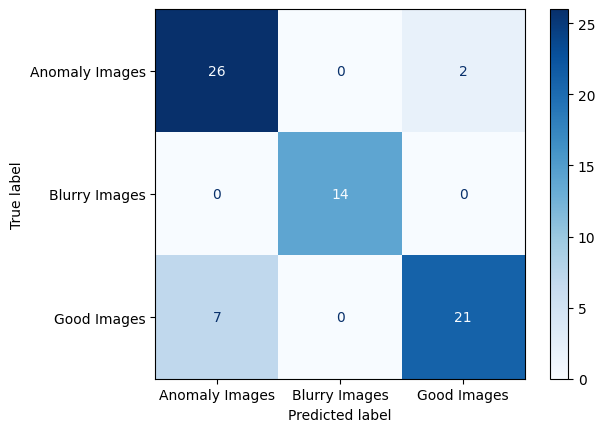

In [14]:
labels = list(test_generator.class_indices.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()